Missing:
 CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Types:
 CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']

Head:
    CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    Fr

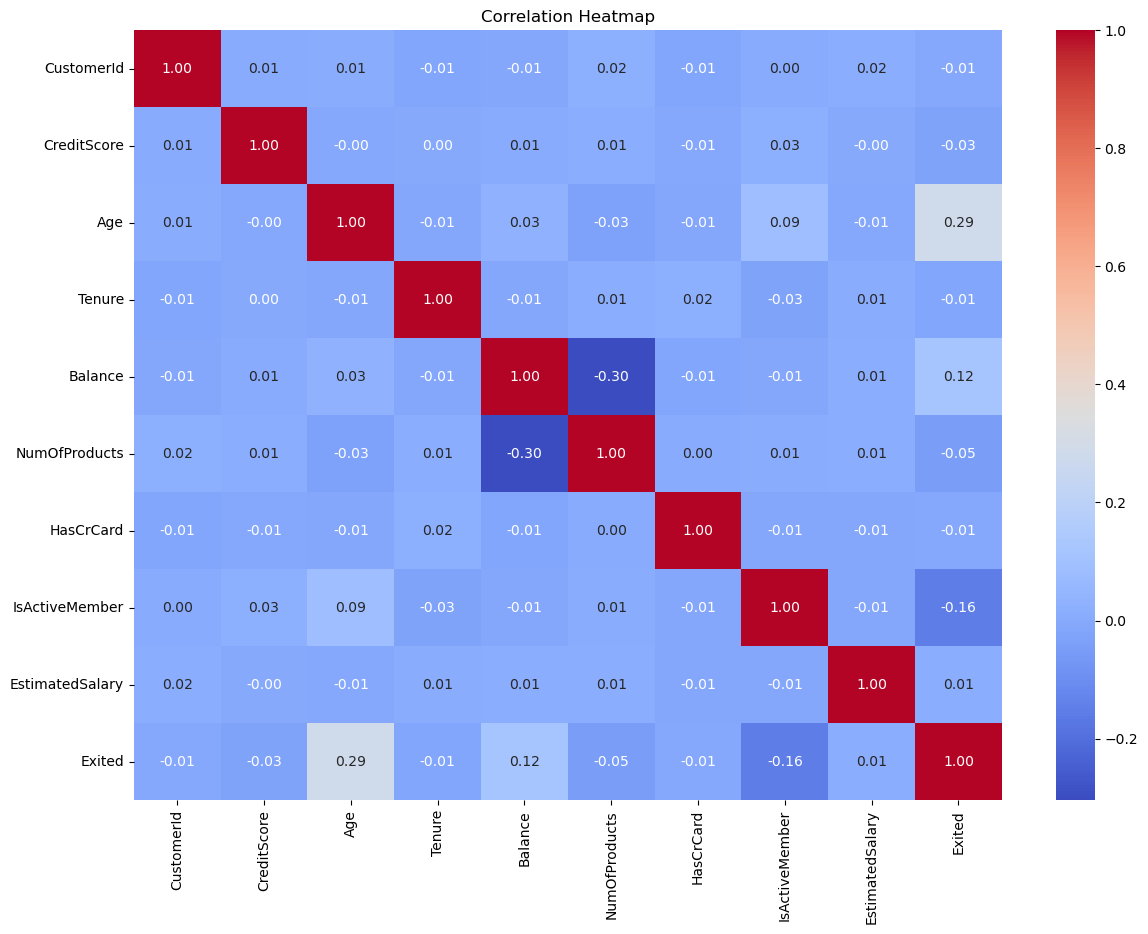

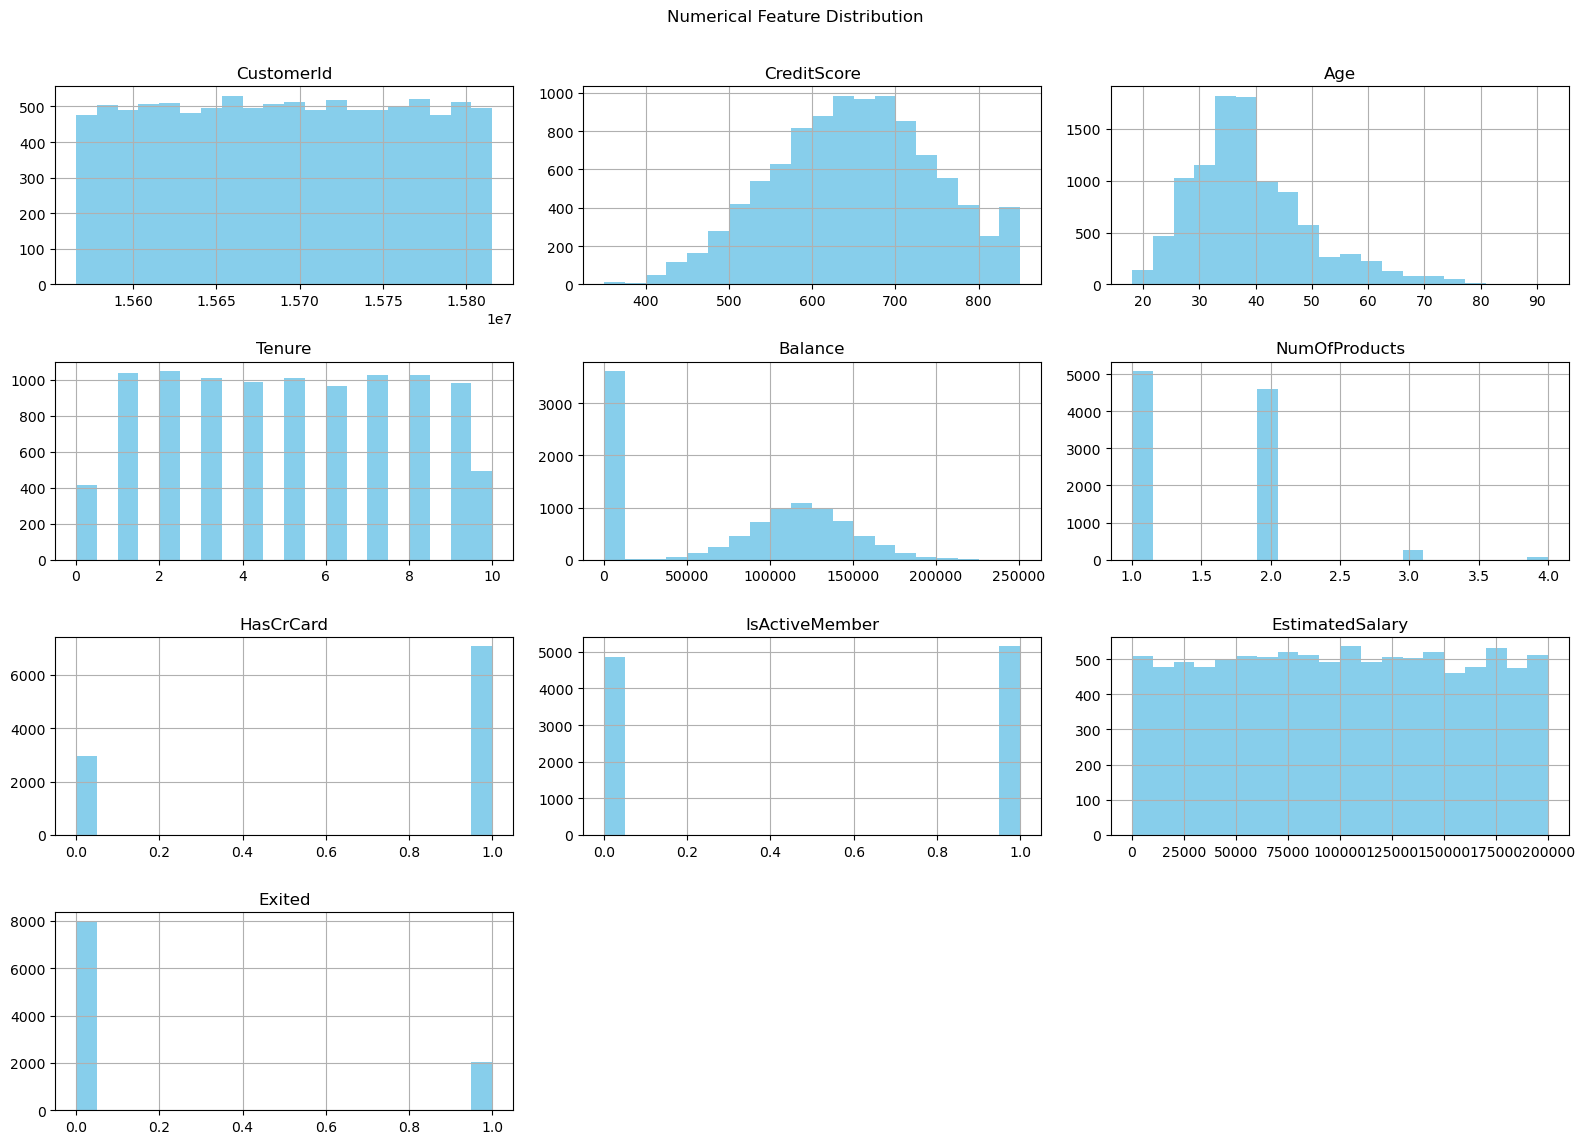

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


df = pd.read_csv('Bank_Churn.csv')

# Pre Data Analysis
print("Missing:\n", df.isnull().sum())
print("\nTypes:\n", df.dtypes)

if 'Geography' in df.columns:
    print("\nGeography:", df['Geography'].unique())
else:
    print("\n'Geography' column not found.")

if 'Gender' in df.columns:
    print("Gender:", df['Gender'].unique())
else:
    print("'Gender' column not found.")

print("\nHead:\n", df.head())

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Histograms
df.select_dtypes(include=np.number).hist(bins=20, figsize=(16, 12), color='skyblue')
plt.suptitle("Numerical Feature Distribution")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


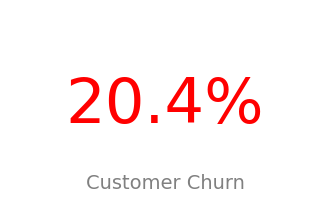

In [2]:
#--- Objective 1: Overall Churn Rate ---
plt.figure(figsize=(4, 2.5))
plt.text(0.5, 0.5, f"{df['Exited'].mean() * 100:.1f}%", fontsize=45, ha='center', va='center', color='red')
plt.text(0.5, 0.1, 'Customer Churn', fontsize=14, ha='center', va='center', color='gray')
plt.axis('off')
plt.show()

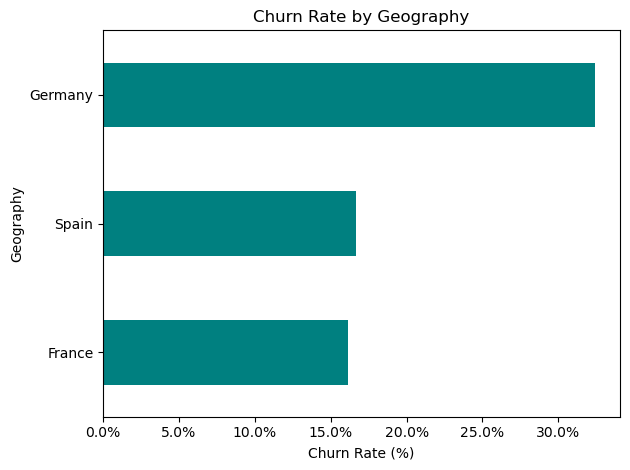

In [3]:
# --- 2. Churn Rate by Geography ---
churn_geo = df.groupby('Geography')['Exited'].mean() * 100
churn_geo.sort_values().plot(kind='barh', color='teal')
plt.xlabel('Churn Rate (%)')
plt.title('Churn Rate by Geography')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

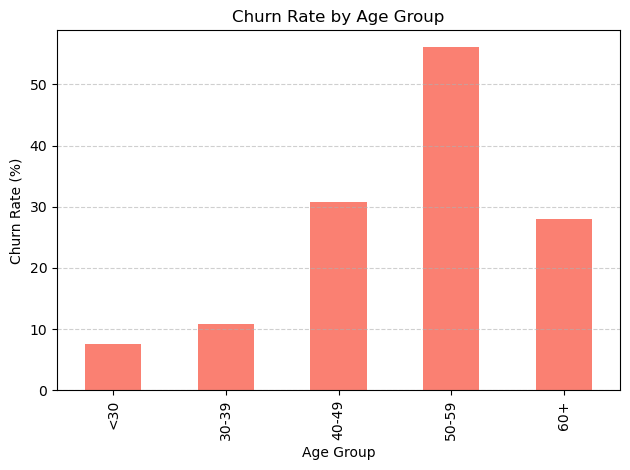

In [10]:
 # --- Objective 3: Churn Rate by Age Group (Simplified Bar Chart) ---
if 'AgeGroup' not in df:
    df['AgeGroup'] = pd.cut(df['Age'], [0, 30, 40, 50, 60, 100],
                            labels=['<30', '30-39', '40-49', '50-59', '60+'], right=False)

# Calculate average churn by AgeGroup
age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100

# Plot as bar chart
age_churn.plot(kind='bar', color='salmon')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# --- Objective 4: Credit Score vs. Balance (Scatter Plot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='Balance', hue='Exited', data=df_clean, 
                palette='coolwarm', alpha=0.6, s=50)

plt.title('Credit Score vs. Balance by Churn Status', fontsize=15)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Account Balance', fontsize=12)
plt.legend(title='Exited (0=No, 1=Yes)')
sns.despine()
plt.tight_layout(); plt.show()

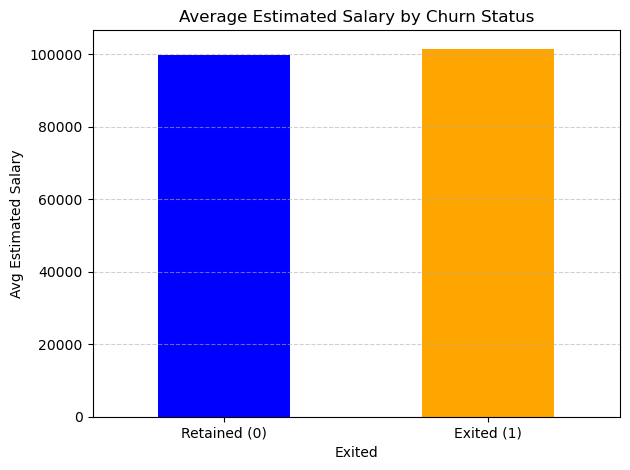

In [11]:
# --- Objective 5: Average Estimated Salary by Churn Status (Simplified Bar Chart) ---
avg_salary = df.groupby('Exited')['EstimatedSalary'].mean()

avg_salary.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Estimated Salary by Churn Status')
plt.xticks(ticks=[0, 1], labels=['Retained (0)', 'Exited (1)'], rotation=0)
plt.ylabel('Avg Estimated Salary')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

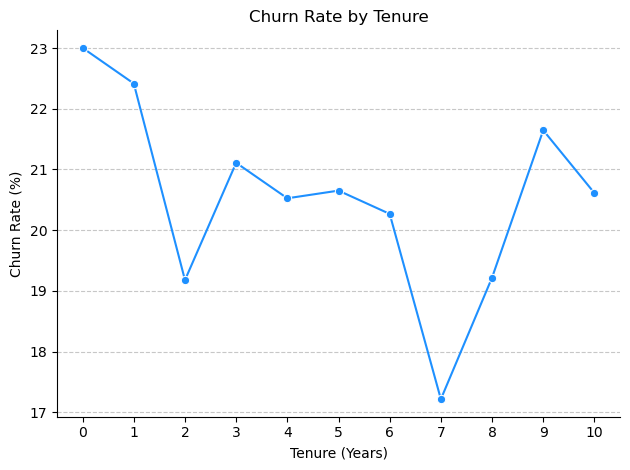

In [7]:
# --- Objective 6: Churn Rate by Customer Tenure ---
tenure_churn = df.groupby('Tenure')['Exited'].mean() * 100
sns.lineplot(x=tenure_churn.index, y=tenure_churn.values, marker='o', color='dodgerblue')

plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate (%)')
plt.xticks(range(df['Tenure'].min(), df['Tenure'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

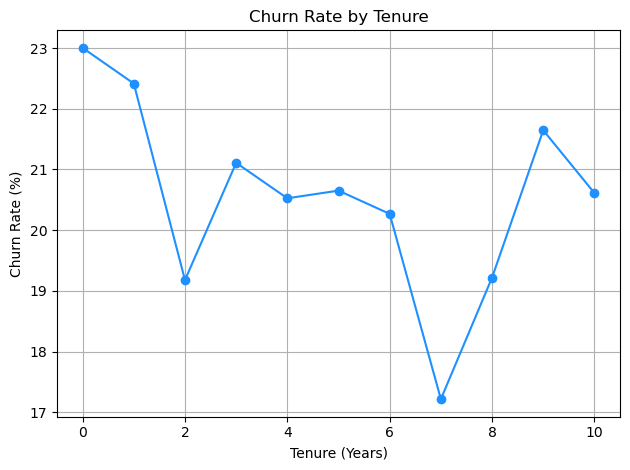

In [8]:
# --- Objective 7: Interaction: Gender & Credit Card vs. Churn ---
churn = df.groupby('Tenure')['Exited'].mean() * 100
churn.plot(marker='o', color='dodgerblue')

plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

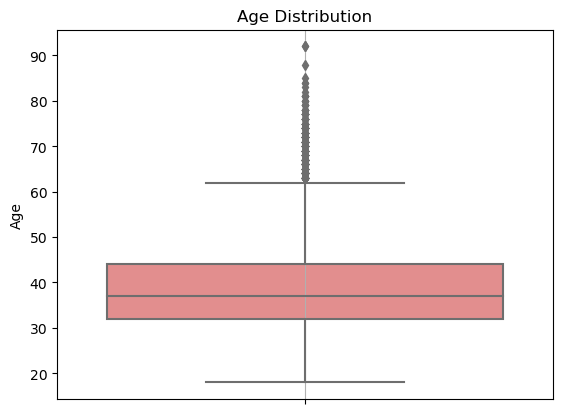

Outliers in Age: 359


In [9]:
# --- Objective 8: Visualize Age Distribution & Outliers ---
sns.boxplot(y='Age', data=df, color='lightcoral')
plt.title('Age Distribution')
plt.grid(axis='x')
plt.show()

# Outliers using IQR
q1, q3 = df['Age'].quantile([0.25, 0.75])
iqr = q3 - q1
outliers = df[(df['Age'] < q1 - 1.5 * iqr) | (df['Age'] > q3 + 1.5 * iqr)]
print("Outliers in Age:", len(outliers))